In [64]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../figures/norm.mplstyle')
from scipy.optimize import curve_fit

In [50]:
ns = [44, 196, 928, 4516, 22372]
ks = {}
ds = {}

ks['p=7'] = [3, 5, 13, 22, 65]
ds['p=7'] = [19,64,310,1947,9722]

ks['p=10'] = [2,4,9,15,45]
ds['p=10'] = [23, 54, 346, 2042, 10663]

ks['p=12'] = [2, 3, 8, 13, 38]
ds['p=12'] = [20, 84, 55, 2094, 10951]

ks['p=15'] = [2, 3, 6, 10, 30]
ds['p=15'] = [17, 84, 346, 2112, 10882]

ks['p=20'] = [1,3,5,8,23]
ds['p=20'] = [23,54,303,2142,10788]

### k scaling

In [51]:
def adjust_color_brightness(rgb, factor):
    return tuple(min(255, int(c * factor)) for c in rgb)
# Function to convert HEX to RGB
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

blue_hex = '#6167AF'
blue_rgb = hex_to_rgb(blue_hex)
# Generate gradient colors
blues_grad = [adjust_color_brightness(blue_rgb, 1 + i * 0.6) for i in range(3)]
# Convert RGB back to HEX for plotting
blues_hex = ['#' + ''.join(f'{c:02x}' for c in color) for color in blues_grad]

red_hex = '#F15B5B'
red_rgb = hex_to_rgb(red_hex)
# Generate gradient colors
reds_grad = [adjust_color_brightness(red_rgb, 1 + i * 0.6) for i in range(3)]
# Convert RGB back to HEX for plotting
reds_hex = ['#' + ''.join(f'{c:02x}' for c in color) for color in reds_grad]

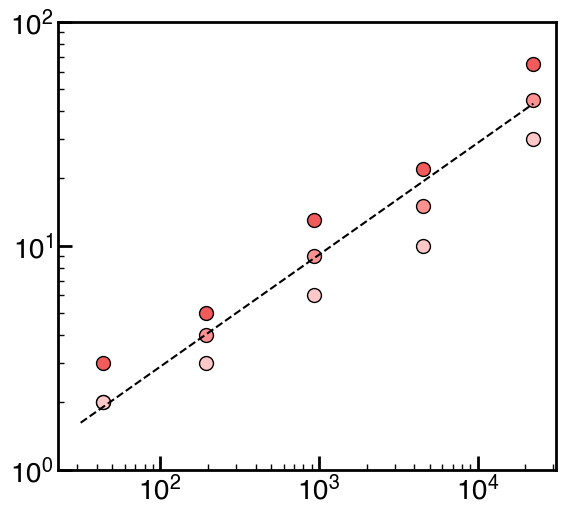

In [59]:
fig, ax = plt.subplots()
for i, p in enumerate(['p=7', 'p=10', 'p=15']):
    ax.scatter(ns, ks[p], label=p, s=100, marker='o', edgecolors='k', c=reds_hex[i])
# linear fit for p=10
from scipy.optimize import curve_fit
def func(x, a):
    return a * np.power(x, 1/2)
popt, pcov = curve_fit(func, ns, ks['p=10'])
ns_plot = np.linspace(np.power(10,1.5), np.max(ns)+100, 1000)
ax.plot(ns_plot, func(np.array(ns_plot), *popt), 'k--')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_yticks([1, 10, 100])
fig.tight_layout()
fig.set_size_inches(6, 6)
fig.savefig('../figures/pinwheel_ks.pdf')

### d scaling

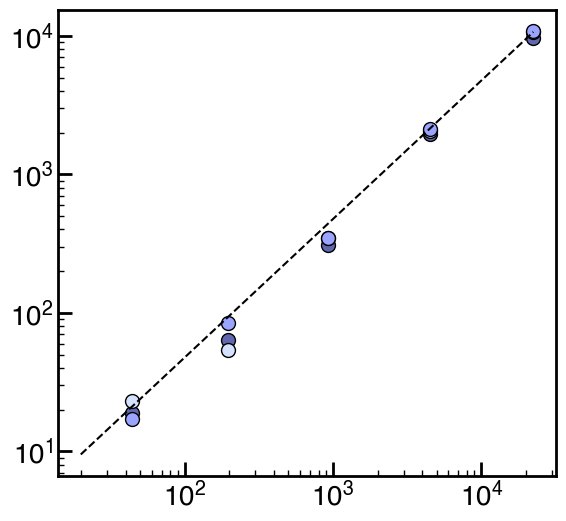

In [62]:
fig, ax = plt.subplots()
for i, p in enumerate(['p=7', 'p=10', 'p=15']):
    ax.scatter(ns, ds[p], label=p, s=100, marker='o', edgecolors='k', c=blues_hex[-i])
# sqrt fit for p=15
def func(x, a):
    return a * x
popt, pcov = curve_fit(func, ns, ds['p=10'])
ns_plot = np.linspace(np.power(10, 1.3), np.max(ns)+100, 100)
ax.plot(ns_plot, func(ns_plot, *popt), 'k--')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_yticks([10, 100, 1000, 10000])
fig.tight_layout()
fig.set_size_inches(6, 6)
fig.savefig('../figures/pinwheel_ds.pdf')

### k, d scaling

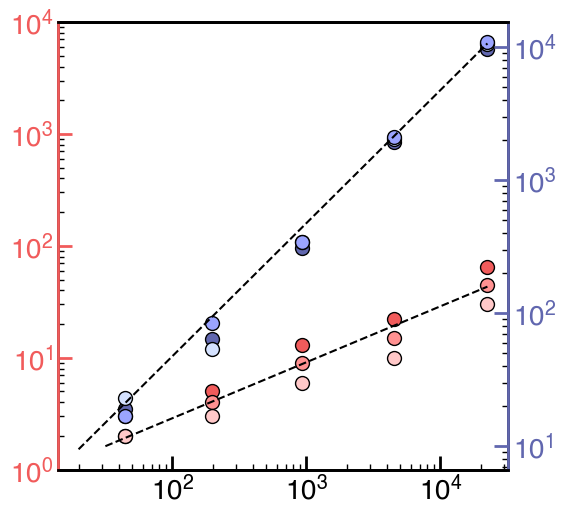

In [76]:
fig, ax1 = plt.subplots()
for i, p in enumerate(['p=7', 'p=10', 'p=15']):
    ax1.scatter(ns, ks[p], label=p, s=100, marker='o', edgecolors='k', c=reds_hex[i])
def func(x, a):
    return a * np.power(x, 1/2)
popt, pcov = curve_fit(func, ns, ks['p=10'])
ns_plot = np.linspace(np.power(10,1.5), np.max(ns)+100, 1000)
ax1.plot(ns_plot, func(np.array(ns_plot), *popt), 'k--')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_yticks([1, 10, 100,1000, 10000])
# ax1.spines['left'].set_edgecolor('#F15B5B')
ax1.tick_params(axis="y", colors='#F15B5B', labelcolor='#F15B5B')

ax2 = ax1.twinx()
for i, p in enumerate(['p=7', 'p=10', 'p=15']):
    ax2.scatter(ns, ds[p], label=p, s=100, marker='o', edgecolors='k', c=blues_hex[-i])
# sqrt fit for p=15
def func(x, a):
    return a * x
popt, pcov = curve_fit(func, ns, ds['p=10'])
ns_plot = np.linspace(np.power(10, 1.3), np.max(ns)+100, 100)
ax2.plot(ns_plot, func(ns_plot, *popt), 'k--')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_yticks([10, 100, 1000, 10000])
ax2.spines['left'].set_edgecolor('#F15B5B')
ax2.spines['right'].set_edgecolor('#6167AF')
ax2.tick_params(axis="y", colors='#6167AF', labelcolor='#6167AF')

fig.tight_layout()
fig.set_size_inches(6, 6)
fig.savefig('../figures/pinwheel_kds.pdf')